In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import jdatetime as jd
import numpy as np
sb.set()

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import and clean Dateset

In [3]:
robin_df = pd.read_csv("report.csv")

index_drop = ['toSlStr','branchId','rpStatusId', 'bourseAccountName', 'toCustomerId'
    ,'toDlId', 'payToStr', 'payFromStr', 'rpTypeId','rpStatusName' 
    ,'branchName', 'paymentNumber', 'paymentId', 'rpTypeStr', 'insertDateTime']


for i in index_drop:
    robin_df.drop(labels=i,axis=1, inplace = True)
    
robin_df

,paymentDate,amount,toSlId,statusStr,userName
0,1402/11/25,3500000,111104,-,shabani
1,1395/10/04,740883770,13372868,-,rh1
2,1395/10/05,130213200,69943028,-,khodaei
3,1395/10/14,5071451214,111104,پرداخت,khodaei
4,1401/11/30,960161,111104,-,shirazi
...,...,...,...,...,...
214415,1399/01/31,629420,111104,-,rousta
214416,1399/01/31,628650,111104,-,rousta
214417,1399/01/31,625498,111104,-,rousta
214418,1399/01/31,625395,111104,-,rousta


In [4]:
robin_df.describe()

,amount,toSlId
count,2.144200e+05,2.144200e+05
mean,1.898413e+09,4.262829e+07
std,1.839112e+10,8.655972e+07
min,0.000000e+00,1.070650e+05
25%,1.887800e+04,1.111040e+05
50%,3.476255e+05,9.742968e+06
75%,2.000000e+07,9.742968e+06
max,2.919105e+12,2.497017e+08


slicing to y/m/d and Numbering

In [5]:
robin_df = robin_df[robin_df['statusStr'] == 'پرداخت']
robin_df = robin_df[robin_df['toSlId'] == 111104]
robin_df.reset_index(inplace=True)

In [6]:
Days_list = []
Days_lists = robin_df.copy()
geor_year = []


for i in range(len(robin_df)):
    
    y = int(robin_df['paymentDate'][i][0:4])
    m = int(robin_df['paymentDate'][i][5:7])
    d = int(robin_df['paymentDate'][i][8:10])

    day = jd.datetime(year=y, month=m, day=d).strftime('%a')
    Days_list.append(day)
    year = jd.JalaliToGregorian(jyear=y,jmonth=m,jday=d).getGregorianList()
    geor_year.append(year)
    
    
day_map = {'Mon': 3, 'Tue': 4, 'Wed': 5, 'Thu': 6, 'Fri': 7, 'Sat': 1, 'Sun': 2}
Days_list = list(map(lambda doy: day_map.get(doy), Days_list))

Days_lists['Days'] = Days_list

In [7]:
Days_lists['english_date'] = geor_year
Days_lists

,index,paymentDate,amount,toSlId,statusStr,userName,Days,english_date
0,3,1395/10/14,5071451214,111104,پرداخت,khodaei,4,"(2017, 1, 3)"
1,10,1395/10/01,8691835964,111104,پرداخت,rh1,5,"(2016, 12, 21)"
2,243,1399/02/16,22260279889,111104,پرداخت,sedighi,4,"(2020, 5, 5)"
3,244,1399/02/16,6627224253,111104,پرداخت,sedighi,4,"(2020, 5, 5)"
4,245,1399/02/16,3897953441,111104,پرداخت,sedighi,4,"(2020, 5, 5)"
...,...,...,...,...,...,...,...,...
48338,214134,1399/02/15,12778768281,111104,پرداخت,sedighi,3,"(2020, 5, 4)"
48339,214135,1399/02/15,8262576780,111104,پرداخت,sedighi,3,"(2020, 5, 4)"
48340,214136,1399/02/15,2431616902,111104,پرداخت,sedighi,3,"(2020, 5, 4)"
48341,214137,1399/02/15,2384767332,111104,پرداخت,rousta,3,"(2020, 5, 4)"


grouping days and mean amount

In [8]:
robin_df = robin_df[robin_df['amount'] > np.exp(190.5)]
mean_df = Days_lists.groupby(['english_date'], as_index=False).agg({'amount':'sum', 'toSlId':'sum','Days':'mean'})
mean_df = mean_df[mean_df['english_date'] >= (2023, 8, 23)]
mean_df.reset_index(inplace=True)
mean_df.drop(labels='index',axis=1 ,inplace=True)
mean_df

,english_date,amount,toSlId,Days
0,"(2023, 8, 23)",144245416759,22998528,5.0
1,"(2023, 8, 24)",787569715,1111040,6.0
2,"(2023, 8, 25)",380891891,999936,7.0
3,"(2023, 8, 26)",109569625557,10665984,1.0
4,"(2023, 8, 27)",63066488069,11554816,2.0
...,...,...,...,...
244,"(2024, 5, 14)",37179243093,7666176,4.0
245,"(2024, 5, 15)",41382417437,8221696,5.0
246,"(2024, 5, 16)",255767953,1111040,6.0
247,"(2024, 5, 17)",324418890,666624,7.0


In [9]:
mean_df = mean_df[mean_df['Days'] < 6.0]
mean_df

,english_date,amount,toSlId,Days
0,"(2023, 8, 23)",144245416759,22998528,5.0
3,"(2023, 8, 26)",109569625557,10665984,1.0
4,"(2023, 8, 27)",63066488069,11554816,2.0
5,"(2023, 8, 28)",111518881586,12221440,3.0
6,"(2023, 8, 29)",53215713176,9999360,4.0
...,...,...,...,...
242,"(2024, 5, 12)",110656567036,8666112,2.0
243,"(2024, 5, 13)",83066896868,8999424,3.0
244,"(2024, 5, 14)",37179243093,7666176,4.0
245,"(2024, 5, 15)",41382417437,8221696,5.0


In [10]:
market_df = pd.read_csv('market.csv')
market_df

,Row Labels,Sum of فروش,Sum of خرید
0,1402/01/05,5.499830e+11,1.018550e+12
1,1402/01/06,4.003900e+11,6.082500e+11
2,1402/01/07,4.559440e+11,4.759200e+11
3,1402/01/08,5.211190e+11,5.299120e+11
4,1402/01/09,5.642290e+11,6.014390e+11
...,...,...,...
284,1403/03/09,4.029400e+11,1.529800e+12
285,1403/03/12,3.509670e+11,4.271490e+11
286,1403/03/13,7.901330e+11,7.372300e+11
287,1403/03/16,3.581340e+11,6.750400e+11


In [11]:
market_df = market_df.drop(288 , axis=0)
market_df.describe()

,Sum of فروش,Sum of خرید
count,2.880000e+02,2.880000e+02
mean,6.040378e+11,5.972517e+11
std,2.999657e+11,2.860284e+11
min,2.077110e+11,1.935330e+11
25%,4.077042e+11,4.006538e+11
50%,5.242750e+11,5.178725e+11
75%,6.980052e+11,6.964828e+11
max,2.473250e+12,2.296200e+12


In [12]:
list_of_day = []
geor_years = []
for m in range(len(market_df)):
    
    y1 = int(market_df['Row Labels'][m][0:4])
    m1 = int(market_df['Row Labels'][m][5:7])
    d1 = int(market_df['Row Labels'][m][8:10])

    days = jd.datetime(year=y1, month=m1, day=d1).strftime('%a')
    list_of_day.append(days)
    years = jd.JalaliToGregorian(jyear=y1,jmonth=m1,jday=d1).getGregorianList()
    geor_years.append(years)


day_maps = {'Mon': 3, 'Tue': 4, 'Wed': 5, 'Thu': 6, 'Fri': 7, 'Sat': 1, 'Sun': 2}
list_of_days = list(map(lambda doy: day_maps.get(doy), list_of_day))


market_df['Days list'] = list_of_days
market_df['english_date'] = geor_years
market_df

,Row Labels,Sum of فروش,Sum of خرید,Days list,english_date
0,1402/01/05,5.499830e+11,1.018550e+12,1,"(2023, 3, 25)"
1,1402/01/06,4.003900e+11,6.082500e+11,2,"(2023, 3, 26)"
2,1402/01/07,4.559440e+11,4.759200e+11,3,"(2023, 3, 27)"
3,1402/01/08,5.211190e+11,5.299120e+11,4,"(2023, 3, 28)"
4,1402/01/09,5.642290e+11,6.014390e+11,5,"(2023, 3, 29)"
...,...,...,...,...,...
283,1403/03/08,5.002000e+11,1.439380e+12,4,"(2024, 5, 28)"
284,1403/03/09,4.029400e+11,1.529800e+12,5,"(2024, 5, 29)"
285,1403/03/12,3.509670e+11,4.271490e+11,1,"(2024, 6, 1)"
286,1403/03/13,7.901330e+11,7.372300e+11,2,"(2024, 6, 2)"


In [13]:
jd.JalaliToGregorian(jyear=1402,jmonth=6, jday=1).getGregorianList()

(2023, 8, 23)

In [14]:
market_df = market_df[market_df['english_date'] >= (2023, 8, 23)]
market_df.reset_index(inplace=True)
market_df.drop(labels='index',axis=1 ,inplace=True)
market_df

C:\Users\erfan\AppData\Local\Temp\ipykernel_7516\1011672228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_df.drop(labels='index',axis=1 ,inplace=True)


,Row Labels,Sum of فروش,Sum of خرید,Days list,english_date
0,1402/06/01,3.678870e+11,3.624960e+11,5,"(2023, 8, 23)"
1,1402/06/04,4.324180e+11,3.331880e+11,1,"(2023, 8, 26)"
2,1402/06/05,5.806970e+11,6.771350e+11,2,"(2023, 8, 27)"
3,1402/06/06,4.032750e+11,5.522120e+11,3,"(2023, 8, 28)"
4,1402/06/07,4.423120e+11,4.443050e+11,4,"(2023, 8, 29)"
...,...,...,...,...,...
183,1403/03/08,5.002000e+11,1.439380e+12,4,"(2024, 5, 28)"
184,1403/03/09,4.029400e+11,1.529800e+12,5,"(2024, 5, 29)"
185,1403/03/12,3.509670e+11,4.271490e+11,1,"(2024, 6, 1)"
186,1403/03/13,7.901330e+11,7.372300e+11,2,"(2024, 6, 2)"


In [15]:
market_mean_df = market_df.groupby(['english_date'], as_index=False).mean(['Sum of فروش', 'Sum of خرید'])
market_mean_df

,english_date,Sum of فروش,Sum of خرید,Days list
0,"(2023, 8, 23)",3.678870e+11,3.624960e+11,5.0
1,"(2023, 8, 26)",4.324180e+11,3.331880e+11,1.0
2,"(2023, 8, 27)",5.806970e+11,6.771350e+11,2.0
3,"(2023, 8, 28)",4.032750e+11,5.522120e+11,3.0
4,"(2023, 8, 29)",4.423120e+11,4.443050e+11,4.0
...,...,...,...,...
183,"(2024, 5, 28)",5.002000e+11,1.439380e+12,4.0
184,"(2024, 5, 29)",4.029400e+11,1.529800e+12,5.0
185,"(2024, 6, 1)",3.509670e+11,4.271490e+11,1.0
186,"(2024, 6, 2)",7.901330e+11,7.372300e+11,2.0


In [16]:
def format_date(z):
    listDate = []
    for date in z.english_date:
        a = str(date).replace("(","").replace(")","").replace(" ","").replace(",","/")
        listDate.append(a)
    return listDate

In [17]:
x3 = market_mean_df['english_date']
x3

0      (2023, 8, 23)
1      (2023, 8, 26)
2      (2023, 8, 27)
3      (2023, 8, 28)
4      (2023, 8, 29)
           ...      
183    (2024, 5, 28)
184    (2024, 5, 29)
185     (2024, 6, 1)
186     (2024, 6, 2)
187     (2024, 6, 5)
Name: english_date, Length: 188, dtype: object

In [18]:
def find_dif(a,b):
    return list(set(a['english_date'])-set(b['english_date']))

In [19]:
mean_df

,english_date,amount,toSlId,Days
0,"(2023, 8, 23)",144245416759,22998528,5.0
3,"(2023, 8, 26)",109569625557,10665984,1.0
4,"(2023, 8, 27)",63066488069,11554816,2.0
5,"(2023, 8, 28)",111518881586,12221440,3.0
6,"(2023, 8, 29)",53215713176,9999360,4.0
...,...,...,...,...
242,"(2024, 5, 12)",110656567036,8666112,2.0
243,"(2024, 5, 13)",83066896868,8999424,3.0
244,"(2024, 5, 14)",37179243093,7666176,4.0
245,"(2024, 5, 15)",41382417437,8221696,5.0


In [20]:
mean_rm = find_dif(mean_df, market_mean_df)
market_rm = find_dif(market_mean_df, mean_df)
mean_rm

[(2023, 12, 17),
 (2024, 2, 11),
 (2023, 9, 16),
 (2023, 9, 6),
 (2023, 10, 3),
 (2024, 4, 10),
 (2024, 5, 4),
 (2024, 3, 19),
 (2024, 2, 25),
 (2023, 9, 24)]

In [21]:
def drop_diff(df, rm):
    for ik in df.iterrows():
        temp_var = ik[1]['english_date']
        if rm.__contains__(temp_var):
            df.drop(index=ik[0],inplace=True)
            
            
drop_diff(market_mean_df, market_rm)
drop_diff(mean_df, mean_rm)
mean_df

C:\Users\erfan\AppData\Local\Temp\ipykernel_7516\504220976.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=ik[0],inplace=True)
C:\Users\erfan\AppData\Local\Temp\ipykernel_7516\504220976.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=ik[0],inplace=True)
C:\Users\erfan\AppData\Local\Temp\ipykernel_7516\504220976.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=ik[0],inplace=True)
C:\U

,english_date,amount,toSlId,Days
0,"(2023, 8, 23)",144245416759,22998528,5.0
3,"(2023, 8, 26)",109569625557,10665984,1.0
4,"(2023, 8, 27)",63066488069,11554816,2.0
5,"(2023, 8, 28)",111518881586,12221440,3.0
6,"(2023, 8, 29)",53215713176,9999360,4.0
...,...,...,...,...
242,"(2024, 5, 12)",110656567036,8666112,2.0
243,"(2024, 5, 13)",83066896868,8999424,3.0
244,"(2024, 5, 14)",37179243093,7666176,4.0
245,"(2024, 5, 15)",41382417437,8221696,5.0


In [22]:
y = mean_df['amount']
y_prime = market_mean_df['Sum of فروش']
y3 = market_mean_df['Sum of خرید']

x = mean_df['english_date']
x = x.reset_index()
x.drop(labels='index',axis=1, inplace=True)

x

,english_date
0,"(2023, 8, 23)"
1,"(2023, 8, 26)"
2,"(2023, 8, 27)"
3,"(2023, 8, 28)"
4,"(2023, 8, 29)"
...,...
173,"(2024, 5, 12)"
174,"(2024, 5, 13)"
175,"(2024, 5, 14)"
176,"(2024, 5, 15)"


In [23]:
y = np.array(y,dtype=float)
y_prime = np.array(y_prime, dtype=float)
y3 = np.array(y3,dtype=float)

In [24]:
x.english_date

0      (2023, 8, 23)
1      (2023, 8, 26)
2      (2023, 8, 27)
3      (2023, 8, 28)
4      (2023, 8, 29)
           ...      
173    (2024, 5, 12)
174    (2024, 5, 13)
175    (2024, 5, 14)
176    (2024, 5, 15)
177    (2024, 5, 18)
Name: english_date, Length: 178, dtype: object

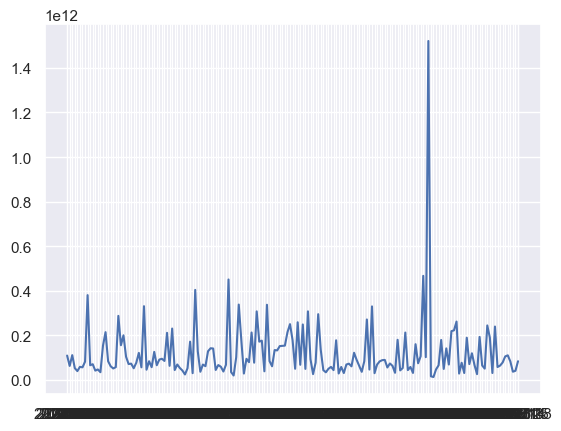

In [25]:
logy = np.log(y[:])
logy2 = np.log(y_prime[:])
logy3 = np.log(y3[:])
plt.plot(format_date(x)[1:], y[1:])
plt.show()


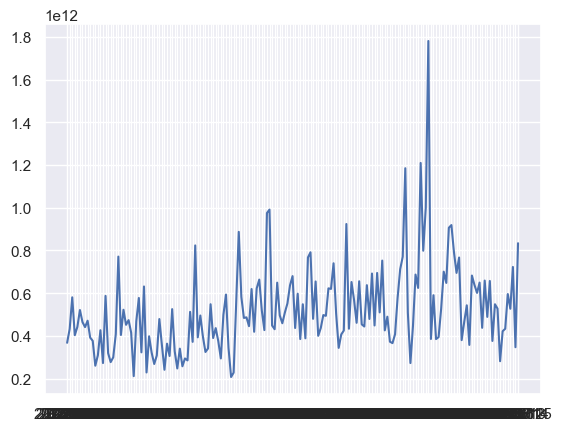

In [26]:
plt.plot(format_date(x)[:-1], y_prime[:-1])
plt.show()

In [27]:
y1 = y[1:]
y2 = y_prime[:-1]

In [28]:
corr_coeff = np.corrcoef(y1,y2)

print("Spearman rank correlation coefficient:", corr_coeff)

Spearman rank correlation coefficient: [[1.         0.57089608]
 [0.57089608 1.        ]]


In [29]:
max_index = y1.argmax()
y1 = np.delete(y1,max_index)
y2 = np.delete(y2,max_index)

In [30]:
mod = sm.OLS(y1, y2)
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.664
Model:                            OLS   Adj. R-squared (uncentered):              0.662
Method:                 Least Squares   F-statistic:                              345.1
Date:                Mon, 01 Jul 2024   Prob (F-statistic):                    3.00e-43
Time:                        11:26:44   Log-Likelihood:                         -4675.1
No. Observations:                 176   AIC:                                      9352.
Df Residuals:                     175   BIC:                                      9355.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2148      0.012     18.576      0.000       0.192       0.238
==============================================================================
Omnibus:                       51.588   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.479
Skew:                           1.329   Prob(JB):                     1.02e-24
Kurtosis:                       5.828   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

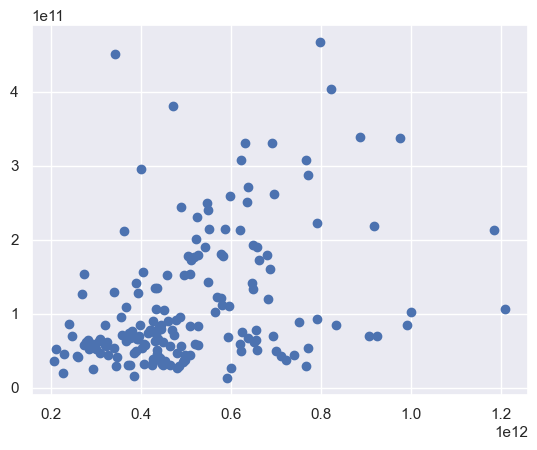

In [31]:
plt.scatter(y2,y1)
plt.show()


In [32]:
y1_matrix = y1.reshape(-1, 1)
y2_matrix = y2.reshape(-1, 1)

In [33]:
y2.shape

(176,)

In [34]:
reg = LinearRegression()
reg.fit(y1_matrix, y2_matrix)

LinearRegression()

In [35]:
reg.score(y1_matrix, y2_matrix)

0.14486143348157532

In [36]:
reg.coef_

array([[0.77564866]])

In [37]:
reg.intercept_

array([4.2520082e+11])

In [38]:
scaler = StandardScaler()
scaler.fit(y1_matrix)
y1_transformed = scaler.transform(y1_matrix)
y1_transformed

array([[-2.50226998e-02],
       [-5.43200736e-01],
       [-3.30240912e-03],
       [-6.52966560e-01],
       [-8.01171774e-01],
       [-5.88619423e-01],
       [-6.12777491e-01],
       [-3.29800977e-01],
       [ 2.99631250e+00],
       [-5.08835726e-01],
       [-4.57268922e-01],
       [-7.76947467e-01],
       [-7.19668944e-01],
       [-8.56357558e-01],
       [ 4.71232907e-01],
       [ 1.14493886e+00],
       [-3.07330521e-01],
       [-5.59799846e-01],
       [-6.69117106e-01],
       [-6.03978512e-01],
       [ 1.95929160e+00],
       [ 4.90526278e-01],
       [ 9.87869367e-01],
       [-8.11387749e-02],
       [-4.47742921e-01],
       [-4.28266043e-01],
       [-6.58954653e-01],
       [-3.81155781e-01],
       [ 1.08608208e-01],
       [-6.12413227e-01],
       [ 2.44331728e+00],
       [-7.30551985e-01],
       [-3.08650792e-01],
       [-6.05446307e-01],
       [ 1.60628653e-01],
       [-5.08111932e-01],
       [-2.24902796e-01],
       [-1.85649004e-01],
       [-2.9

In [39]:
reg1 = LinearRegression()
reg1.fit(y1_transformed, y2_matrix)
reg1.coef_

array([[6.96094659e+10]])

In [40]:
reg1.intercept_

array([5.1193017e+11])

In [41]:
x_train, x_test, y_train, y_test = train_test_split(y1_transformed, y2_matrix, test_size=0.2, random_state=7) 

In [42]:
Reg = LinearRegression()
Reg.fit(x_train, y_train)

LinearRegression()

In [43]:
y_hat = Reg.predict(x_train)

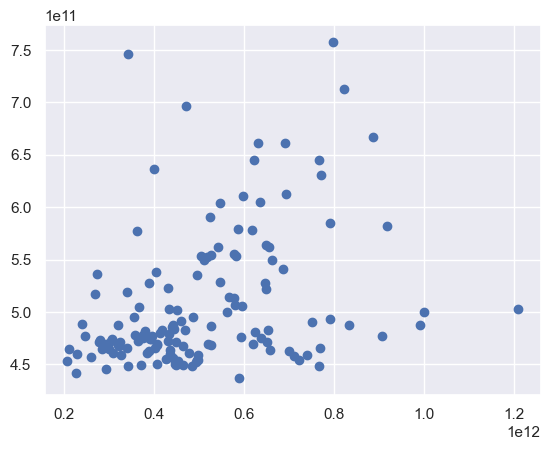

In [44]:
plt.scatter(y_train, y_hat)
plt.show()

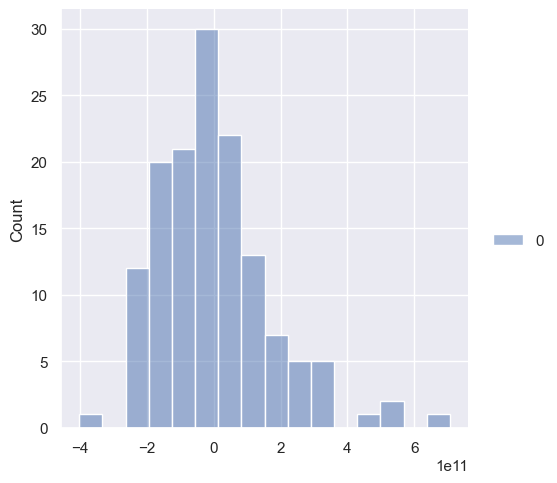

In [45]:
sb.displot(y_train - y_hat)